In [1]:
from pyspark.sql import SparkSession

In [2]:
spark = SparkSession.Builder().appName("Analysis").master("local[12]").getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/09 09:44:41 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/10/09 09:44:41 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
23/10/09 09:44:41 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


In [3]:
df = spark.read.parquet("../test_data.parquet")
df.show()

+--------------------+--------+------------------+---------------+--------------------+----+-------------------+------------+--------------+--------------------+
|                  Id|Notional|     Interest Rate|Reset Frequency|          Start Date|Term| Remaining Notional|Payment Type|Risk Indicator|     Next Reset Date|
+--------------------+--------+------------------+---------------+--------------------+----+-------------------+------------+--------------+--------------------+
|0761b4f3-7a45-4d0...|  441950|1.3723296724041503|             10|2004-02-28 09:10:...|  25| 107541.16666666663|      Linear|             0|2029-02-21 09:10:...|
|7220a011-cdc8-48e...|  216599| 3.601022009185459|             25|2001-05-16 09:10:...|  30|           216599.0|      Bullet|             2|2031-05-09 09:10:...|
|8a84ea3f-c05b-482...|  680797| 2.360662518868855|             15|1999-08-13 09:10:...|  20|-151917.56489184173|     Annuity|             1|2021-08-07 09:10:...|
|74347abc-83cf-430...|  6842

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import matplotlib as mpl
from pyspark.sql import functions as fn

+---------------+------------------+----------------------+
|Reset Frequency|avg(Interest Rate)|count(Reset Frequency)|
+---------------+------------------+----------------------+
|              5|1.2112569582144075|                 72116|
|              7|1.3152152386120852|                 38742|
|              9|1.6102779459008556|                 48757|
|             10|1.7108326143245447|                100054|
|             15| 2.213922880837765|                204084|
|             20|2.7122564525140604|                282771|
|             25|3.1126591611424015|                211816|
|             30|3.4119085077663054|                 41660|
+---------------+------------------+----------------------+



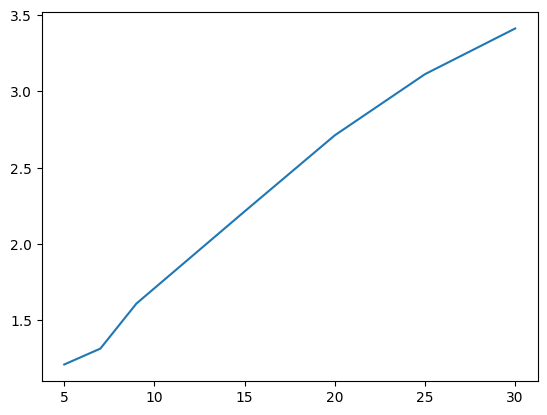

In [5]:
fig, ax = plt.subplots()
rateAvg = df.groupBy('Reset Frequency').agg(fn.mean('Interest Rate'), fn.count('Reset Frequency')).orderBy('Reset Frequency')

types = [x['Reset Frequency'] for x in rateAvg.select('Reset Frequency').collect()]
rates = [x['avg(Interest Rate)'] for x in rateAvg.select("avg(Interest Rate)").collect()]

ax.plot(types, rates)
rateAvg.show()

+--------------+------------------+---------------------+
|Risk Indicator|avg(Interest Rate)|count(Risk Indicator)|
+--------------+------------------+---------------------+
|             0| 2.196030915894399|               799295|
|             1| 2.495329597739603|               100503|
|             2|3.2976366381512467|                50153|
|             3| 4.088981333406422|                30081|
|             4|5.6974264997369355|                19968|
+--------------+------------------+---------------------+



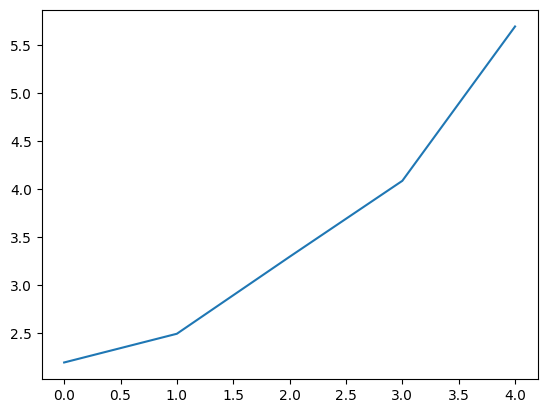

In [6]:
fig, ax = plt.subplots()
riskAvg = df.groupBy('Risk Indicator').agg(fn.mean('Interest Rate'), fn.count('Risk Indicator')).orderBy('Risk Indicator')

types = [x['Risk Indicator'] for x in riskAvg.select('Risk Indicator').collect()]
rates = [x['avg(Interest Rate)'] for x in riskAvg.select("avg(Interest Rate)").collect()]

ax.plot(types, rates)
riskAvg.show()

In [7]:
freq = df.filter(df['Reset Frequency'] == 7).select(["Start Date", "Next Reset Date", "Term"])
freq.show()

+--------------------+--------------------+----+
|          Start Date|     Next Reset Date|Term|
+--------------------+--------------------+----+
|2016-08-13 09:10:...|2023-08-12 09:10:...|  20|
|2016-04-09 09:10:...|2023-04-08 09:10:...|  30|
|2022-04-16 09:10:...|2029-04-14 09:10:...|  25|
|2020-01-06 09:10:...|2027-01-04 09:10:...|  25|
|2021-11-15 09:10:...|2028-11-13 09:10:...|  25|
|2019-01-28 09:10:...|2026-01-26 09:10:...|  20|
|2020-11-12 09:10:...|2027-11-11 09:10:...|  25|
|2019-03-20 09:10:...|2026-03-18 09:10:...|  25|
|2018-08-26 09:10:...|2025-08-24 09:10:...|  20|
|2020-08-29 09:10:...|2027-08-28 09:10:...|  20|
|2017-12-14 09:10:...|2024-12-12 09:10:...|  20|
|2021-11-02 09:10:...|2028-10-31 09:10:...|  30|
|2019-11-02 09:10:...|2026-10-31 09:10:...|  20|
|2016-12-09 09:10:...|2023-12-08 09:10:...|  20|
|2021-07-18 09:10:...|2028-07-16 09:10:...|  20|
|2022-06-05 09:10:...|2029-06-03 09:10:...|  20|
|2022-02-06 09:10:...|2029-02-04 09:10:...|  25|
|2017-02-19 09:10:..

In [11]:
notionalCheck = df.filter(df['Remaining Notional'] <= 0).count()
print(notionalCheck)
if notionalCheck > 0:
        raise Exception("bruh moment")

37993


Exception: bruh moment

In [10]:
duplicatesCheck = df.dropDuplicates(['Id'])
print(duplicatesCheck.count())
if duplicatesCheck.count() != df.count():
    raise Exception("bruh moment")

1000000


In [13]:
wtf = df.filter(df['Remaining Notional'] <= 0)
wtf.show()

+--------------------+--------+------------------+---------------+--------------------+----+-------------------+------------+--------------+--------------------+
|                  Id|Notional|     Interest Rate|Reset Frequency|          Start Date|Term| Remaining Notional|Payment Type|Risk Indicator|     Next Reset Date|
+--------------------+--------+------------------+---------------+--------------------+----+-------------------+------------+--------------+--------------------+
|8a84ea3f-c05b-482...|  680797| 2.360662518868855|             15|1999-08-13 09:10:...|  20|-151917.56489184173|     Annuity|             1|2021-08-07 09:10:...|
|8e89be09-d77e-490...|  498246|1.1649434450136718|             10|2002-10-19 09:10:...|  20|-6991.5505093577085|     Annuity|             0|2022-10-14 09:10:...|
|3dc2c92f-d487-45a...|  311366|0.7307157415260137|              5|2001-05-16 09:10:...|  20| -28059.18883777765|     Annuity|             0|2026-05-10 09:10:...|
|e762d98e-8500-477...|  5686

In [14]:
spark.stop

AttributeError: 'SparkSession' object has no attribute 'close'